In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from preprocessing.corpus import build_corpus
from preprocessing.data_preparation import prepare_and_merge_datasets
from wordcloud import WordCloud

In [3]:
df_dataset = pd.read_csv("dataset.csv", index_col=0)
df_dataset.head()

,class,content
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,#2013Faves RT &#8220;@grahamorama: #Snoop and ...
2,0,"#AZmonsoon lot of rain, too bad it wasn't enou..."
3,1,#AskDems Aren't you embarrassed that Charlie R...
4,1,#BREAKING: AP calls Mass. Governor race for Ch...


In [4]:
hate_speech = build_corpus(df_dataset[df_dataset["class"] == 0])
non_hate_speech = build_corpus(df_dataset[df_dataset["class"] == 1])

c:\users\d070497\.virtualenvs\hatespeechdetection-7g6oikfm\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
c:\users\d070497\.virtualenvs\hatespeechdetection-7g6oikfm\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\d070497\.virtualenvs\hatespeechdetection-7g6oikfm\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value 

In [5]:
pd.set_option('display.max_colwidth', None)
hate_speech

,class,content,tokens
2,0,#azmonsoon lot of rain too bad it wasnt enough to wash away the teabagger racist white trash in the state. #tcot #teaparty #azflooding,"[azmonsoon, lot, rain, bad, not, wash, away, teabagger, racist, white, trash, state, tcot, teaparty, azflooding]"
11,0,#california is full of white trash,"[california, white, trash]"
12,0,#california is full of white trash who moved from #oklahoma,"[california, white, trash, moved, oklahoma]"
14,0,#dtla is trash because of noneuropeans are allowed to live there.,"[dtla, trash, noneuropeans, allowed, live]"
17,0,#dutch farmers are white trash.,"[dutch, farmers, white, trash]"
...,...,...,...
15789,0,and yes they will steal anything from whites because they think whites owe them something so it s ok to steal .,"[yes, steal, whites, think, whites, owe, ok, steal]"
15790,0,i use it as way to intimidae jew to show them that there are still people who are aginst them it did originate in roman it was called the wariors salute,"[use, way, intimidae, jew, people, aginst, originate, roman, called, wariors, salute]"
15811,0,i can only pray this babboon mongoloid did nt have any children so his seed will not continue on on this earth .,"[pray, babboon, mongoloid, nt, children, seed, continue, earth]"
15814,0,trudeau is the white obama as he does nt care about the people of canada but all the third world crap he s allowing into canada,"[trudeau, white, obama, nt, care, people, canada, world, crap, allowing, canada]"


2490
13335


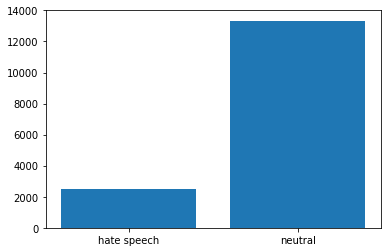

In [6]:
print(len(hate_speech))
print(len(non_hate_speech))

x = ["hate speech", "neutral"]
y = [len(hate_speech), len(non_hate_speech)]
plt.bar([1, 2], y)
plt.xticks([1, 2], x)
plt.savefig("distribution")

In [7]:
def generate_barchart(datacolumn, n=15, title="Bar chart"):
    counter = Counter(datacolumn.explode())
    n_most_common = counter.most_common(n)
    x = np.array(n_most_common).T[0]
    list_of_tuples = list(zip(*n_most_common))
    list_of_lists = [list(elem) for elem in list_of_tuples]
    plt.bar(np.array(list_of_lists[0]), np.array(list_of_lists[1]))
    plt.xticks(range(0, x.shape[0]), x, rotation='vertical')
    plt.title(title)
    plt.savefig(title.replace(" ", ""))
    plt.show()

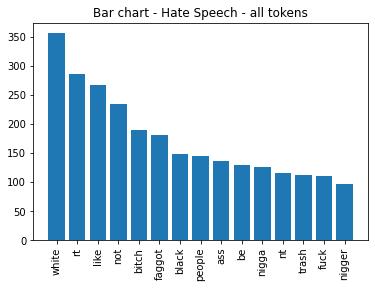

In [9]:
generate_barchart(hate_speech["tokens"], title="Bar chart - Hate Speech - all tokens")

In [10]:
def generate_wordcloud(datacolumn, n=15, title="Wordcloud"):
    counter = Counter(datacolumn.explode())
    n_most_common = counter.most_common(n)
    x = np.array(n_most_common).T[0]
    n_most_common_words_as_string = (" ").join(x)
    wordcloud = WordCloud(background_color="white", stopwords={}).generate(n_most_common_words_as_string)

    fig = plt.figure(1)
    plt.axis("off")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.savefig(title.replace(" ", ""))
    plt.show()

In [14]:
def create_visualizations(dataset, name, n=15):
    generate_barchart(dataset["tokens"], title="Bar chart - " +  name + " - all tokens")
    generate_wordcloud(dataset["tokens"], title="Wordcloud - " +  name + " - all tokens")

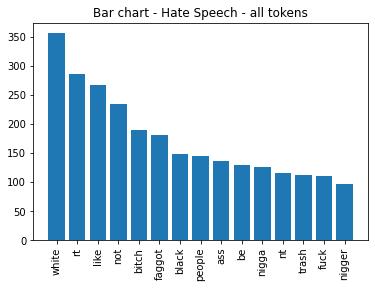

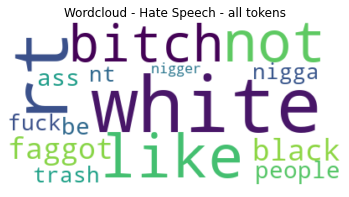

In [15]:
create_visualizations(hate_speech, "Hate Speech", n=15)

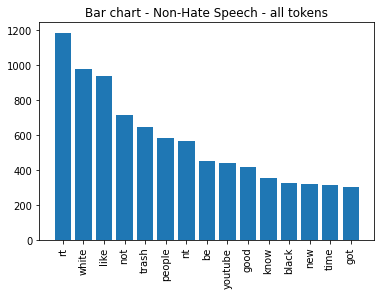

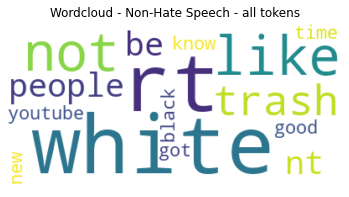

In [16]:
create_visualizations(non_hate_speech, "Non-Hate Speech", n=15)